# This is  an exploratory analysis that gleans out insights and trends in the dataset.
It notices trends in what triggers transactions at certain times of the year, what could be the possible cause of increased failed transactions… etc.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("ggplot")
import pandas as pd
import pymysql.cursors
# %pip install seaborn

In [4]:
# This code reads the data from the file.
data = pd.read_csv(r"C:\Users\ACER\Desktop\Data Science Univel\Programs\Internship Projects\txn_data.csv")
data

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,status,no of txns
0,0,1001192k,2019,10,29,successful,1
1,1,1001192k,2019,11,12,failed,2
2,2,1001192k,2019,11,18,failed,1
3,3,1001192k,2019,11,27,successful,1
4,4,1001192k,2019,12,8,failed,1
...,...,...,...,...,...,...,...
513242,513242,9999437n,2020,10,15,successful,2
513243,513243,9999437n,2020,10,16,successful,1
513244,513244,9999437n,2020,10,21,successful,2
513245,513245,9999437n,2020,10,23,successful,2


In [5]:
len(data)
# data.shape
data = data.rename(columns={"no of txns": "transactions"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513247 entries, 0 to 513246
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    513247 non-null  int64 
 1   acct_no       513247 non-null  object
 2   txnYear       513247 non-null  int64 
 3   txnMonth      513247 non-null  int64 
 4   txnDay        513247 non-null  int64 
 5   status        513247 non-null  object
 6   transactions  513247 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 23.5+ MB


In [6]:
# This code creates a date column, putting the days and month together.

data['date']=data['txnDay'].astype(str)+'-'+data['txnMonth'].astype(str)+'-'+data['txnYear'].astype(str)
data

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,status,transactions,date
0,0,1001192k,2019,10,29,successful,1,29-10-2019
1,1,1001192k,2019,11,12,failed,2,12-11-2019
2,2,1001192k,2019,11,18,failed,1,18-11-2019
3,3,1001192k,2019,11,27,successful,1,27-11-2019
4,4,1001192k,2019,12,8,failed,1,8-12-2019
...,...,...,...,...,...,...,...,...
513242,513242,9999437n,2020,10,15,successful,2,15-10-2020
513243,513243,9999437n,2020,10,16,successful,1,16-10-2020
513244,513244,9999437n,2020,10,21,successful,2,21-10-2020
513245,513245,9999437n,2020,10,23,successful,2,23-10-2020


In [5]:
data.dtypes

Unnamed: 0       int64
acct_no         object
txnYear          int64
txnMonth         int64
txnDay           int64
status          object
transactions     int64
date            object
dtype: object

In [7]:
# The column date type,was changed from into to datetime here.

data['date'] =  pd.to_datetime(data['date'])
data

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,status,transactions,date
0,0,1001192k,2019,10,29,successful,1,2019-10-29
1,1,1001192k,2019,11,12,failed,2,2019-12-11
2,2,1001192k,2019,11,18,failed,1,2019-11-18
3,3,1001192k,2019,11,27,successful,1,2019-11-27
4,4,1001192k,2019,12,8,failed,1,2019-08-12
...,...,...,...,...,...,...,...,...
513242,513242,9999437n,2020,10,15,successful,2,2020-10-15
513243,513243,9999437n,2020,10,16,successful,1,2020-10-16
513244,513244,9999437n,2020,10,21,successful,2,2020-10-21
513245,513245,9999437n,2020,10,23,successful,2,2020-10-23


In [9]:
# These are the last few rows of the data. 
# Notice that there are no transactions for the month of November and December for the year 2020.

data.tail()

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,status,transactions,date
513242,513242,9999437n,2020,10,15,successful,2,2020-10-15
513243,513243,9999437n,2020,10,16,successful,1,2020-10-16
513244,513244,9999437n,2020,10,21,successful,2,2020-10-21
513245,513245,9999437n,2020,10,23,successful,2,2020-10-23
513246,513246,9999437n,2020,10,26,successful,1,2020-10-26


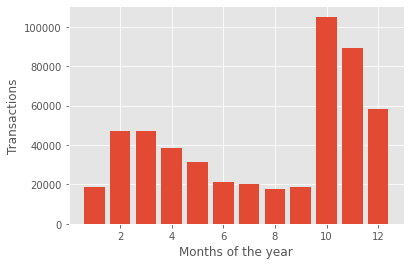

In [10]:
# This shows the transactions trends in the months of both years. 
# It shows the last three months of the year experienced the most transactions. 

fig, ax = plt.subplots()  
x = data.txnMonth.unique() 
y = data.txnMonth.value_counts()
ax.bar(x, y)  
ax.set_xlabel('Months of the year')  
ax.set_ylabel('Transactions')
plt.show()

As shown in the last plot, the last three months of the year experienced the most transactions. 

In [11]:
successful = data['status'][data['status'] == 'successful']
successful

0         successful
3         successful
5         successful
6         successful
7         successful
             ...    
513242    successful
513243    successful
513244    successful
513245    successful
513246    successful
Name: status, Length: 473051, dtype: object

In [10]:
failed = data['status'][data['status'] == 'failed']
failed

1         failed
2         failed
4         failed
19        failed
31        failed
           ...  
513130    failed
513143    failed
513162    failed
513163    failed
513210    failed
Name: status, Length: 28636, dtype: object

In [12]:
# This shows the status of all the transactions.
# Most of the transactions were successful.

data.groupby("status").count()

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,transactions,date
status,,,,,,,
debited,37,37,37,37,37,37,37
declined,10243,10243,10243,10243,10243,10243,10243
failed,28636,28636,28636,28636,28636,28636,28636
initialized,1216,1216,1216,1216,1216,1216,1216
pending,64,64,64,64,64,64,64
successful,473051,473051,473051,473051,473051,473051,473051


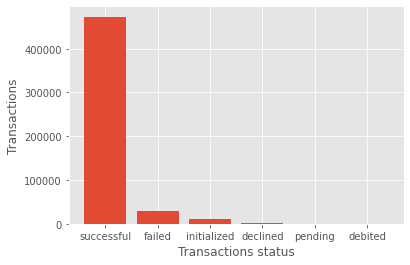

In [16]:
# This is a graphical representation of all the transactions.

fig, ax = plt.subplots()  
x = data.status.unique()  
# Counting the transactions in the dataset  
y = data.status.value_counts()
year = data.txnYear.value_counts() 
# Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Transactions status')  
ax.set_ylabel('Transactions')  
plt.show()  

c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='txnYear', ylabel='count'>

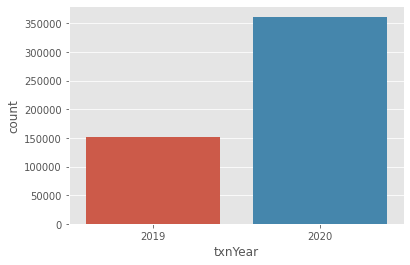

In [14]:
# This is the graphical representation of the transactions of botth years.
# Year 2020 had the higher number of transactions.
# This could be due to the COVID-19 pandemic, the country experienced lockdown for the most part of the year (total and partial locakdown).
# So people could not go about their businesses as usual, stayinng indoors, working from home, being sick most likely led to more consumption and transactions.

sns.countplot(data.txnYear)

c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='count'>

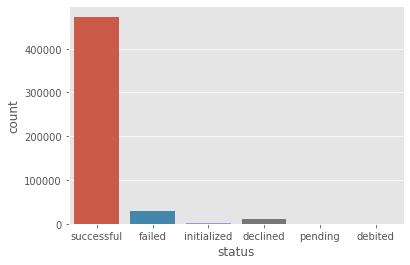

In [70]:


sns.countplot(data.status)

c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='count'>

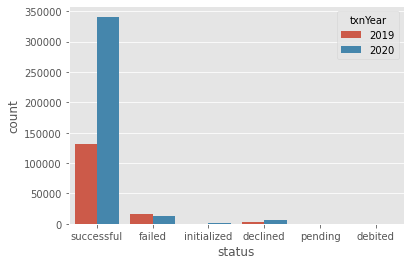

In [18]:
# This shows the various transactions status for each year.

sns.countplot('status', hue = 'txnYear', data = data)

In [19]:
# This is the data for the year 2019.

data2019 = data[data.txnYear == 2019]
data2019

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,status,transactions,date
0,0,1001192k,2019,10,29,successful,1,2019-10-29
1,1,1001192k,2019,11,12,failed,2,2019-12-11
2,2,1001192k,2019,11,18,failed,1,2019-11-18
3,3,1001192k,2019,11,27,successful,1,2019-11-27
4,4,1001192k,2019,12,8,failed,1,2019-08-12
...,...,...,...,...,...,...,...,...
513073,513073,9996144s,2019,12,9,successful,1,2019-09-12
513074,513074,9996144s,2019,12,16,successful,1,2019-12-16
513177,513177,9999437n,2019,12,24,successful,1,2019-12-24
513178,513178,9999437n,2019,12,25,successful,1,2019-12-25


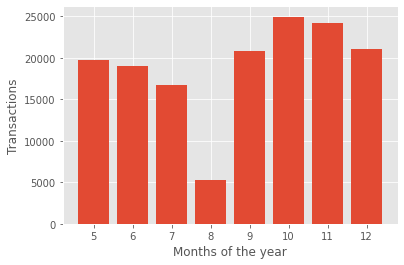

In [20]:
#This is the graphical representation for each month in the year 2019.
# The last 3 months experienced the most transactions. This could be due to the festivities during those period.
# June, July and August had the least transactions, people could be trying to save up for the festival periods, hence the reduction in transactions.

fig, ax = plt.subplots()  
x = data2019.txnMonth.unique() 
y = data2019.txnMonth.value_counts()
ax.bar(x, y)  
ax.set_xlabel('Months of the year')  
ax.set_ylabel('Transactions')
plt.show()

In [21]:
# This shows the breakdown of the transactions status for the year 2019.

data2019.groupby("status").count()

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,transactions,date
status,,,,,,,
debited,30,30,30,30,30,30,30
declined,3451,3451,3451,3451,3451,3451,3451
failed,15621,15621,15621,15621,15621,15621,15621
initialized,465,465,465,465,465,465,465
pending,42,42,42,42,42,42,42
successful,131974,131974,131974,131974,131974,131974,131974


c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='count'>

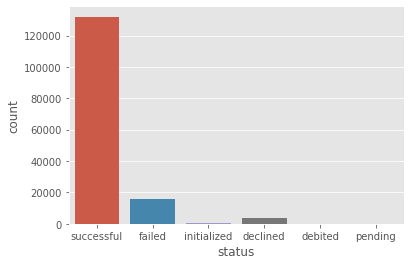

In [22]:
# This is the graphical representation.

sns.countplot(data2019.status)

c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


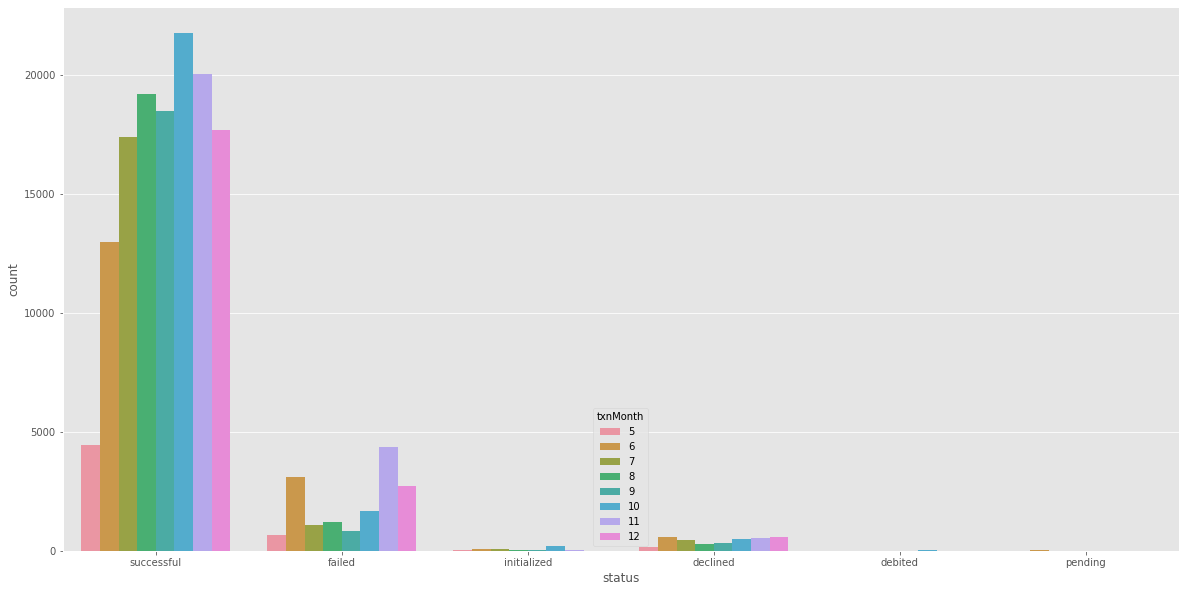

In [23]:
# This graph is showing the different transactions status of each month of the year 2019.
# Most of the transactions were successful. The month of October had the most successful transactions.
# The month of November has the most failed transactions.
plt.figure(figsize = (20,10))
sns.countplot('status', hue = 'txnMonth', data = data2019)
plt.show()

In [24]:
# This shows the breakdown of the transactions status for the year 2020.

data2020 = data[data.txnYear == 2020]
data2020

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,status,transactions,date
7,7,1001192k,2020,2,6,successful,1,2020-06-02
8,8,1001192k,2020,3,8,successful,1,2020-08-03
9,9,1001192k,2020,3,10,successful,1,2020-10-03
10,10,1001192k,2020,3,17,successful,1,2020-03-17
11,11,1001192k,2020,3,25,successful,2,2020-03-25
...,...,...,...,...,...,...,...,...
513242,513242,9999437n,2020,10,15,successful,2,2020-10-15
513243,513243,9999437n,2020,10,16,successful,1,2020-10-16
513244,513244,9999437n,2020,10,21,successful,2,2020-10-21
513245,513245,9999437n,2020,10,23,successful,2,2020-10-23


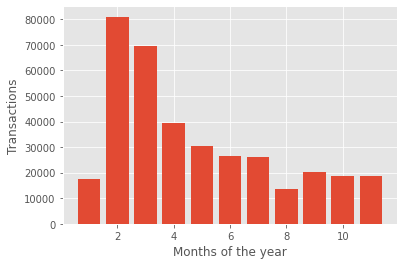

In [25]:
#This is the graphical representation for each month in the year 2020.
# February, March and April had the most transactions. The COVID-19 got into the country during this period and the lockdown began during this period.
# There was a surge in buying of items, hence the rise in transactions.
fig, ax = plt.subplots()  
x = data2020.txnMonth.unique() 
y = data2020.txnMonth.value_counts()
ax.bar(x, y)  
ax.set_xlabel('Months of the year')  
ax.set_ylabel('Transactions')
plt.show()

In [26]:
# This shows the breakdown of the transactions status for the year 2020.

data2020.groupby("status").count()

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,transactions,date
status,,,,,,,
debited,7,7,7,7,7,7,7
declined,6792,6792,6792,6792,6792,6792,6792
failed,13015,13015,13015,13015,13015,13015,13015
initialized,751,751,751,751,751,751,751
pending,22,22,22,22,22,22,22
successful,341077,341077,341077,341077,341077,341077,341077


c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='count'>

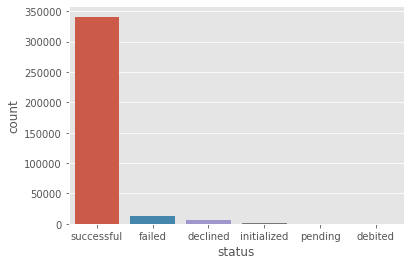

In [100]:
# This is the graphical representation.

sns.countplot(data2020.status)

In [ ]:
# This graph is showing the different transactions status of each month of the year 2020.
# The months of October and November experienced the most successful transactions.
# They also experienced the most failed. This surge could be due to the #EndSARS protest that took place against police brutality.
plt.figure(figsize = (20,10))
sns.countplot('status', hue = 'txnMonth', data = data2020)
plt.show()

c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
